# PMT Example

A somewhat more involved example of OO programming in Python

We'll define a structure to hold photomultiplier tubes.  We'll define a PMT class that has:

* Data:
    * ID: Unique ID number
    * position: a list or array with the x,y,z position of the TUBE
    * offset: offset to convert raw data to calibrated data
    * gain: gain to convert raw data to calibrated data
    * _raw: Internal variable to hold raw data from dummy readout routine (initialized to -1)
* Methods:
    * __init__(self, ID, position, offset=0.0, gain=1.0, threshold=100.): constructor
    * read_raw(self,raw_value): dummy routine to "read out" data
    * get_calibrated(self):     return the calibrated value 
    * has_data(self):           tests whether there is data
    * clear(self):              clear data after readout

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

In [2]:
#
# Good programming practice...
# Define the __main__ loop here at the top and then call it at the end after all the routines
# have been defined.
#
def main():
    # Print the documentation
    print_docs(PMT)

    # Load the PMTs from a file
    PMTs = load_pmts("detector.csv")
    # Display the PMTs
    display_PMTs(PMTs)

    # Do the first run
    print("\nFirst Run")
    # Load first set of hits
    load_hits("hits1.csv",PMTs)
    # scan for hits
    scan_PMTs(PMTs)

    # Do the second run
    print("\nSecond Run")
    # Load second set up hits
    load_hits("hits2.csv",PMTs)

    # This time save everything to a pickle file
    f = open("data.pkl","wb")  # Open for write
    pickle.dump(PMTs,f)
    f.close()

    # Now read it back in
    f = open("data.pkl","rb")  # Open for read
    PMT_load = pickle.load(f)
    f.close()
    
    # scan for hits
    scan_PMTs(PMTs)

In [ ]:
#main()  # I can use this once I go through the code once

In [3]:
#
# Define a class for a photomultiplier tube.
#
class PMT:
    """Class defining a photomultiplier tube (PMT)"""                           
    def __init__(self, ID, position, offset=0.0, gain=1.0, threshold=100.):   
        self.ID = ID                # Unique ID number
        self.position = position    # Position [x,y,z]
        self.offset = offset        # Offset
        self.gain = gain            # gain
        self._raw = -1.             # raw value (-1 means "no data")

    # Dummy routine.  This takes the place of raw data readout
    def read_raw(self, raw_value):
        """Simulate reading a raw value from the PMT."""
        self._raw = raw_value
        
    # This returns the calibrated data
    def get_calibrated(self):
        """Return the calibrated sensor reading."""
        return self.gain * self._raw + self.offset

    # This will tell if the signal is above threshold
    def is_hit(self):
        """Return the hit status"""
        return (self._raw>=0.)

    # This will clear the data for the next readout
    def clear(self):
        """Clears raw data"""
        self._raw = -1.

    # The __str__ method is
    def __str__(self):
        return f"Sensor(ID={self.ID}, position=[{self.position[0]:.2f},{self.position[1]:.2f},{self.position[2]:.2f}], gain={self.gain}, offset={self.offset})"

In [4]:
# load PMTs from a CSV file into a group of objects and return it as a list of PMTs
def load_pmts(file):
    df = pd.read_csv("detector.csv")
    PMTs = []
    for i in range(len(df)):
        r = df.loc[i]
        # Extract the elements individually to make it more readable.
        ID = int(r['ID'])
        position = [r['x'],r['y'],r['z']]
        offset = r['offset']
        gain = r['gain']
        # Now create the object
        pmt = PMT(ID,position,offset=offset,gain=gain)
        # Append it to the list
        PMTs += [pmt]
    return PMTs

In [5]:
# Routine to display the PMTs
def display_PMTs(PMTs):
    # Build up lists of X and Y positions
    x = []
    y = []
    for pmt in PMTs:
        x += [pmt.position[0]]
        y += [pmt.position[1]]
    # Display them in a scatter plot
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(x,y)
    plt.show()    

In [6]:
# Print the documentation
def print_docs(myclass):
    print("Class = ",myclass.__doc__)
    print("methods:")
    # Skip the methods starting with "__"
    methods = [m for m in dir(myclass) if not m.startswith('__')]
    for m_name in methods:
        method = getattr(myclass,m_name)
        print(f"\t{m_name}:\t{method.__doc__}")

In [7]:
# This is dummy routine to load data to PMTs as if we're reading out a detector
def load_hits(file,PMTs):
    hits = pd.read_csv(file)
    for i in range(len(hits)):
        r = hits.loc[i]
        ID=int(r['ID'])

        # Load it to the PMT that matches the ID number
        for pmt in PMTs:
            if pmt.ID == ID:
                pmt.read_raw(r['raw'])   

In [8]:
# scan the PMTs for hits
def scan_PMTs(PMTs):
    # Look through the PMTs and see which ones have been hit
    for pmt in PMTs:
        if pmt.is_hit():
            ID = pmt.ID
            value = pmt.get_calibrated()
            print(f"PMT {ID} hit! Value = {value:.1f}")
            pmt.clear()        # Clear it for the next round


Class =  Class defining a photomultiplier tube (PMT)
methods:
	clear:	Clears raw data
	get_calibrated:	Return the calibrated sensor reading.
	is_hit:	Return the hit status
	read_raw:	Simulate reading a raw value from the PMT.


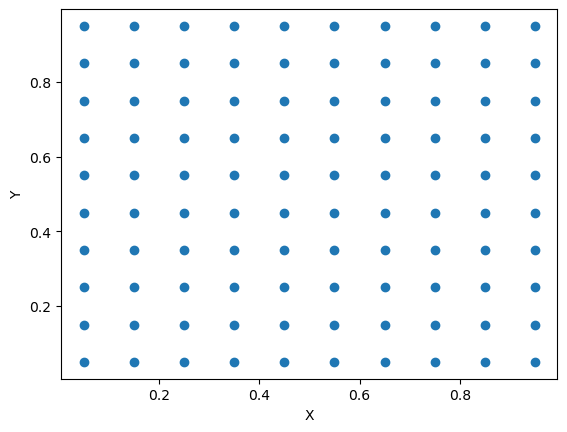


First Run
PMT 5 hit! Value = 96.9
PMT 12 hit! Value = 96.0
PMT 25 hit! Value = 75.9
PMT 27 hit! Value = 135.3
PMT 28 hit! Value = 94.9
PMT 36 hit! Value = 128.2
PMT 45 hit! Value = 77.5
PMT 46 hit! Value = 147.2
PMT 48 hit! Value = 75.2
PMT 49 hit! Value = 70.9
PMT 64 hit! Value = 115.6
PMT 65 hit! Value = 107.9
PMT 69 hit! Value = 48.6
PMT 77 hit! Value = 85.4
PMT 78 hit! Value = 84.6
PMT 83 hit! Value = 110.7
PMT 85 hit! Value = 49.4
PMT 86 hit! Value = 85.9

Second Run
PMT 1 hit! Value = 87.1
PMT 2 hit! Value = 89.7
PMT 9 hit! Value = 63.5
PMT 13 hit! Value = 116.1
PMT 14 hit! Value = 98.3
PMT 22 hit! Value = 124.2
PMT 29 hit! Value = 81.2
PMT 35 hit! Value = 84.8
PMT 39 hit! Value = 105.7
PMT 45 hit! Value = 77.8
PMT 53 hit! Value = 110.4
PMT 55 hit! Value = 106.0
PMT 56 hit! Value = 112.9
PMT 67 hit! Value = 79.5
PMT 79 hit! Value = 90.8
PMT 82 hit! Value = 91.2
PMT 97 hit! Value = 79.8


In [9]:
# Call the main steering routine
main()